In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc = {'figure.figsize':(8, 8)})
sns.set_style("darkgrid")

# Input filename

In [2]:
in_filename = 'results.csv'

# Read in data

In [3]:
in_filename = './sample_data/' + in_filename

In [4]:
df = pd.read_csv(in_filename)
df

,NumRows,Device,Task,Time (seconds)
0,20000000,CPU,Read CSV (single file),10.800
1,20000000,CPU,Read CSV (multiple file),10.800
2,20000000,CPU,Write CSV (single file),76.000
3,20000000,CPU,Write CSV (multiple file),18.700
4,20000000,CPU,Describe dataframe,3.760
5,20000000,CPU,Set index on dataframe,41.100
6,20000000,CPU,Concat multiple dataframes,26.100
7,20000000,CPU,Groupby aggregation (mean),37.400
8,20000000,CPU,Fit label encoder,19.800
9,20000000,CPU,Encode data,13.500


In [5]:
df['Task'].unique()

array(['Read CSV (single file)', 'Read CSV (multiple file)',
       'Write CSV (single file)', 'Write CSV (multiple file)',
       'Describe dataframe', 'Set index on dataframe',
       'Concat multiple dataframes', 'Groupby aggregation (mean)',
       'Fit label encoder', 'Encode data', 'Scale data', 'split data',
       'PCA', 'TruncatedSVD', 'OLS Regression', 'K-Means',
       'Gradient Boosting'], dtype=object)

# Calculate and plot total times
Also saves the plot in the plots folder

In [6]:
total_times = df.groupby(['NumRows', 'Device']).sum()['Time (seconds)'].reset_index()
total_times['Time (seconds)'] = total_times['Time (seconds)'].round(1)

/tmp/ipykernel_19334/3446897871.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_times = df.groupby(['NumRows', 'Device']).sum()['Time (seconds)'].reset_index()


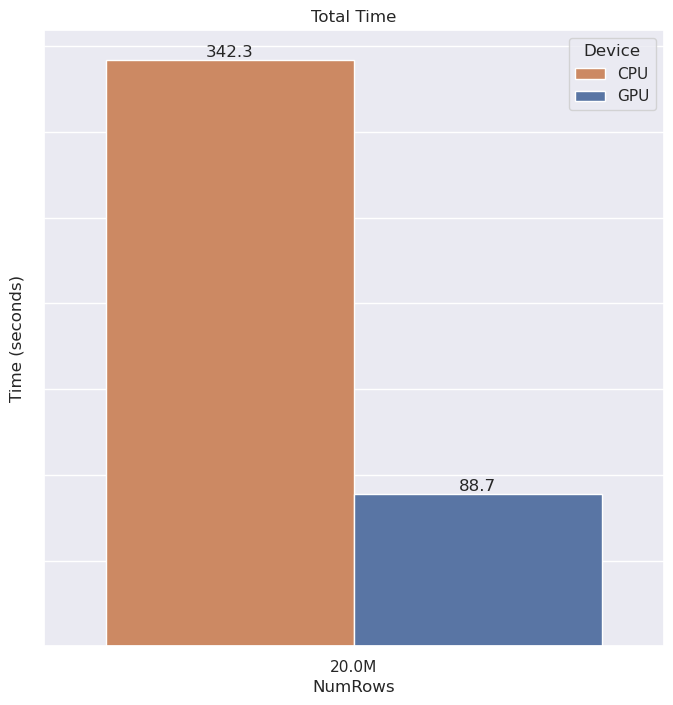

In [7]:
fig = sns.barplot(data=total_times, x='NumRows', y='Time (seconds)', hue='Device', palette=["C1", "C0"])
for container in fig.containers:
    fig.bar_label(container)
fig.set(yticklabels=[])
fig.set_title("Total Time")
xlabels = [f'{x}M' for x in df['NumRows'].unique()/1000000]
fig.set_xticklabels(xlabels)
plt.savefig("./plots/total_time.png", bbox_inches='tight')

# Calculate and plot ETL times
Also saves the plot in the plots folder

In [8]:
etl_tasks = [
    'Read CSV (single file)',
    'Read CSV (multiple file)',
    'Write CSV (single file)',
    'Write CSV (multiple file)',
    'Describe dataframe',
    'Set index on dataframe', 
    'Concat multiple dataframes',
    'Groupby aggregation (mean)', 
    'Fit label encoder', 
    'Encode data',
    'Scale data', 
    'split data',
]

In [9]:
etl_df = df.set_index('Task').loc[etl_tasks].reset_index()
etl_times = etl_df.groupby(['NumRows', 'Device']).sum()['Time (seconds)'].reset_index()
etl_times['Time (seconds)'] = etl_times['Time (seconds)'].round(1)

/tmp/ipykernel_19334/3952852256.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  etl_times = etl_df.groupby(['NumRows', 'Device']).sum()['Time (seconds)'].reset_index()


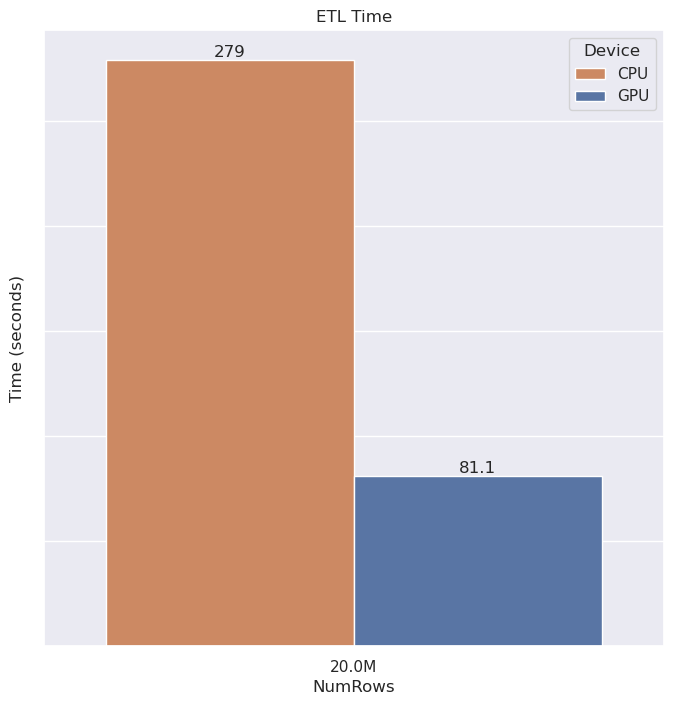

In [10]:
fig = sns.barplot(data=etl_times, x='NumRows', y='Time (seconds)', hue='Device', palette=["C1", "C0"])
for container in fig.containers:
    fig.bar_label(container)
fig.set(yticklabels=[])
fig.set_title("ETL Time")
xlabels = [f'{x}M' for x in df['NumRows'].unique()/1000000]
fig.set_xticklabels(xlabels)
plt.savefig("./plots/etl_time.png", bbox_inches='tight')

# Calculate and plot Dimensionality Reduction times
Also saves the plot in the plots folder

In [11]:
dr_tasks = [
    'PCA',
    'TruncatedSVD', 
]

In [12]:
dr_df = df.set_index('Task').loc[dr_tasks].reset_index()
dr_times = dr_df.groupby(['NumRows', 'Device']).sum()['Time (seconds)'].reset_index()
dr_times['Time (seconds)'] = dr_times['Time (seconds)'].round(1)

/tmp/ipykernel_19334/3076127444.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dr_times = dr_df.groupby(['NumRows', 'Device']).sum()['Time (seconds)'].reset_index()


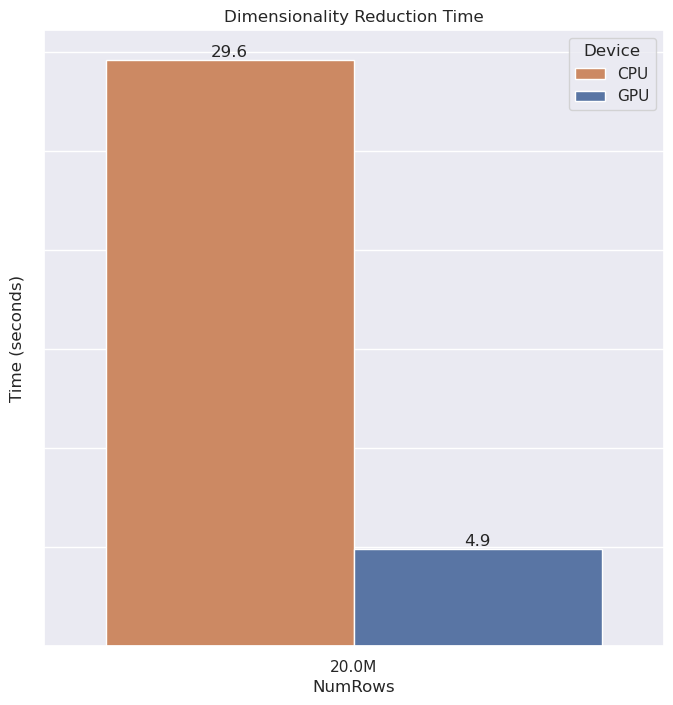

In [13]:
fig = sns.barplot(data=dr_times, x='NumRows', y='Time (seconds)', hue='Device', palette=["C1", "C0"])
for container in fig.containers:
    fig.bar_label(container)
fig.set(yticklabels=[])
fig.set_title("Dimensionality Reduction Time")
xlabels = [f'{x}M' for x in df['NumRows'].unique()/1000000]
fig.set_xticklabels(xlabels)
plt.savefig("./plots/dr_time.png", bbox_inches='tight')

# Calculate and plot ML times
Also saves the plot in the plots folder

In [14]:
ml_tasks = [
    'OLS Regression',
    'K-Means', 
    'Gradient Boosting',
]

In [15]:
ml_df = df.set_index('Task').loc[ml_tasks].reset_index()
ml_times = ml_df.groupby(['NumRows', 'Device']).sum()['Time (seconds)'].reset_index()
ml_times['Time (seconds)'] = ml_times['Time (seconds)'].round(1)

/tmp/ipykernel_19334/2879532208.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ml_times = ml_df.groupby(['NumRows', 'Device']).sum()['Time (seconds)'].reset_index()


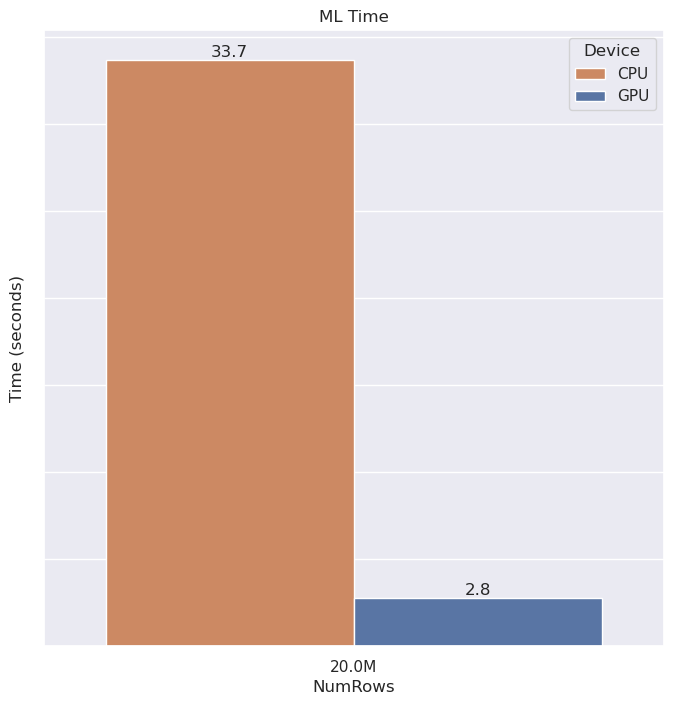

In [16]:
fig = sns.barplot(data=ml_times, x='NumRows', y='Time (seconds)', hue='Device', palette=["C1", "C0"])
for container in fig.containers:
    fig.bar_label(container)
fig.set(yticklabels=[])
fig.set_title("ML Time")
xlabels = [f'{x}M' for x in df['NumRows'].unique()/1000000]
fig.set_xticklabels(xlabels)
plt.savefig("./plots/ml_time.png", bbox_inches='tight')

# Plot individual task times
Also saves the plots in the plots folder

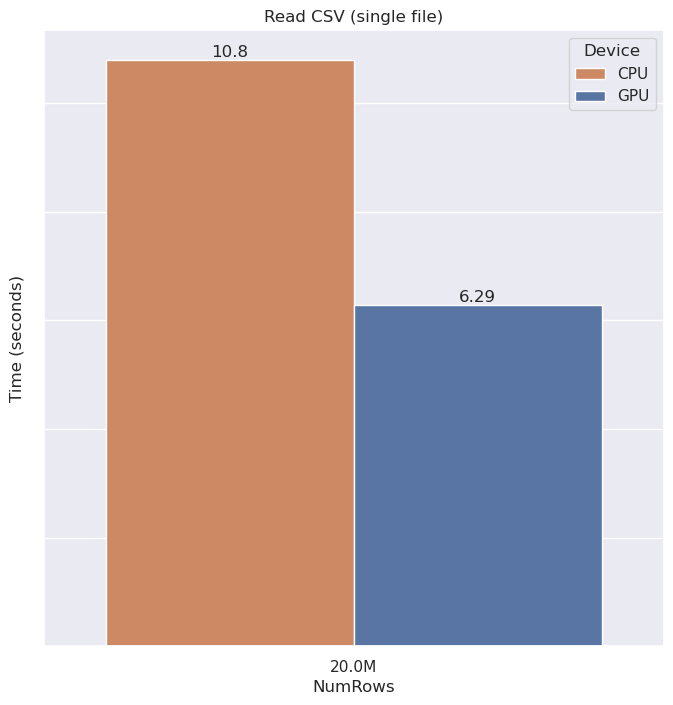

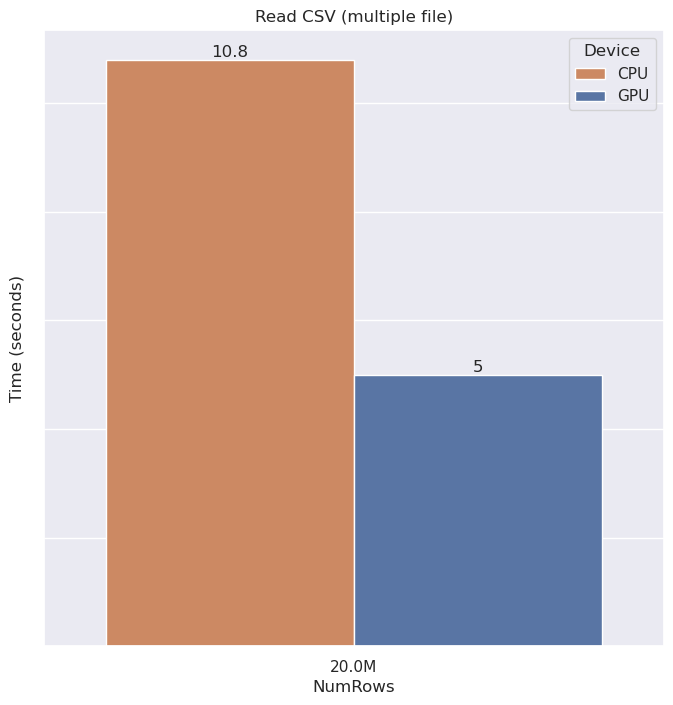

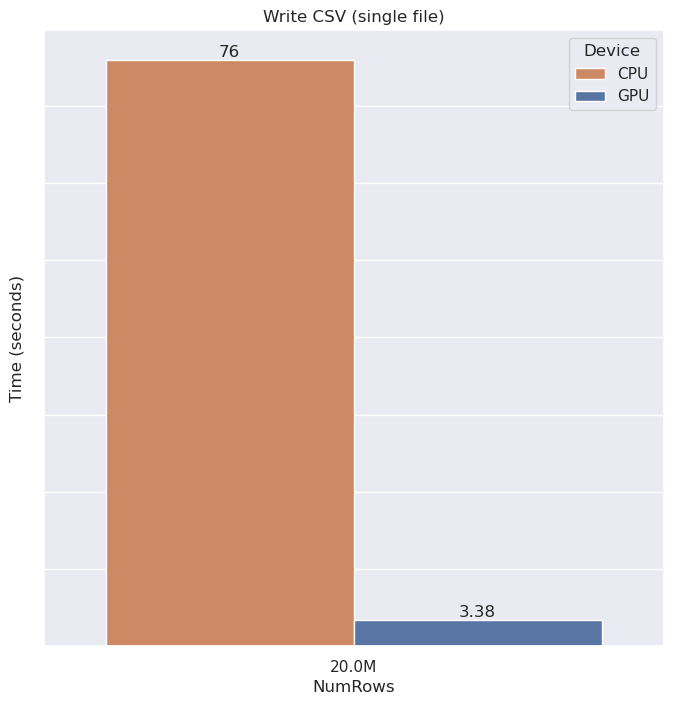

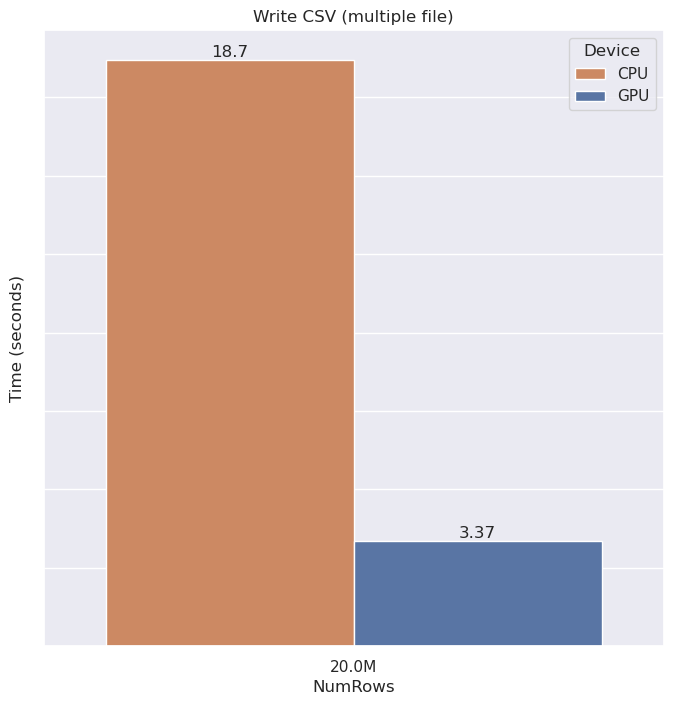

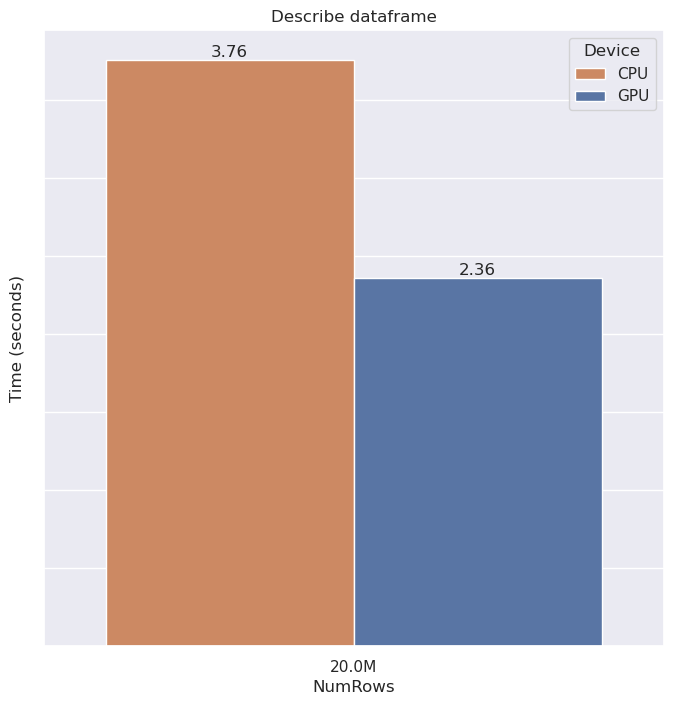

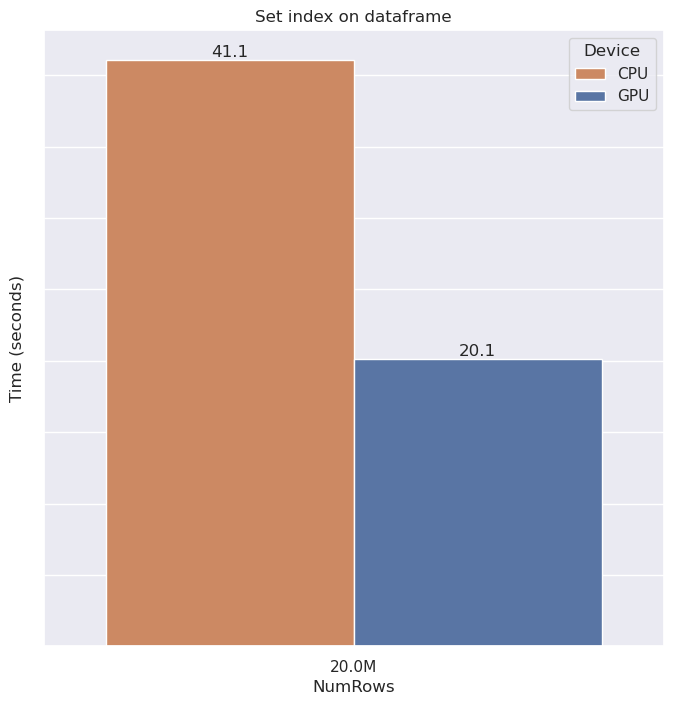

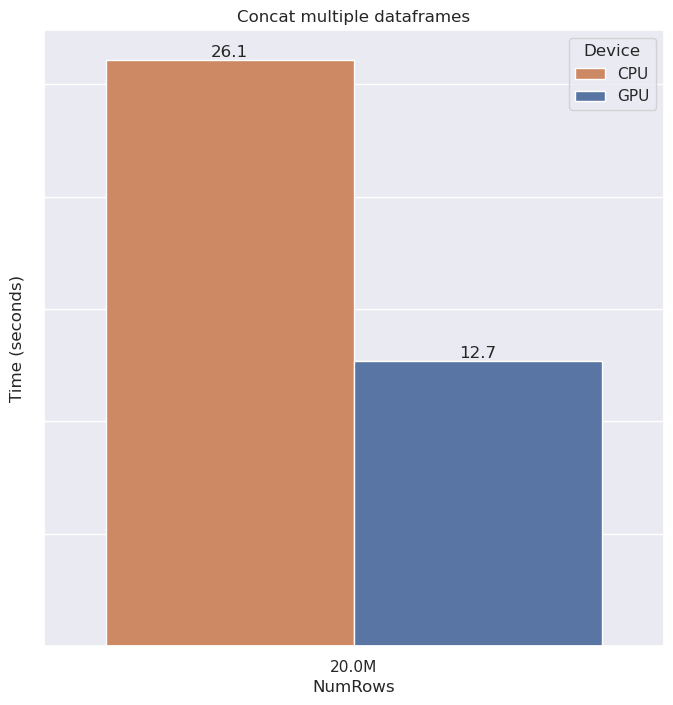

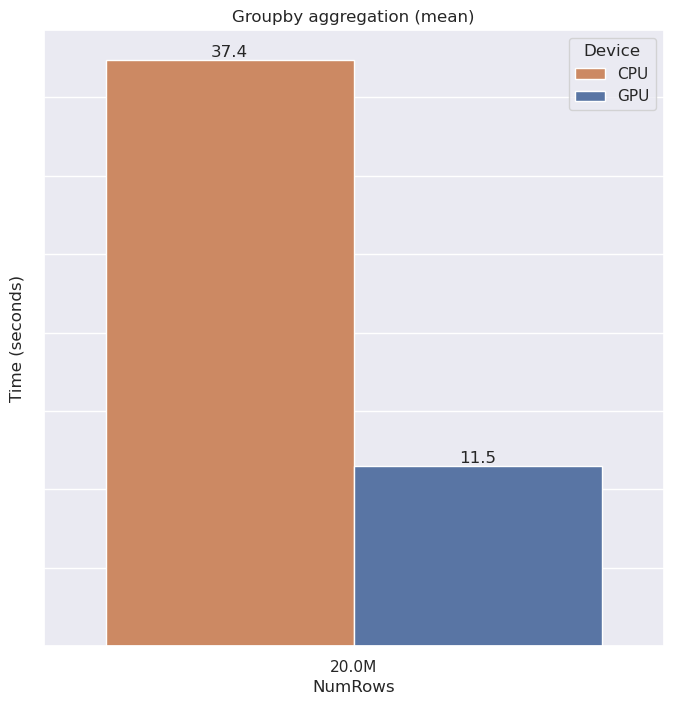

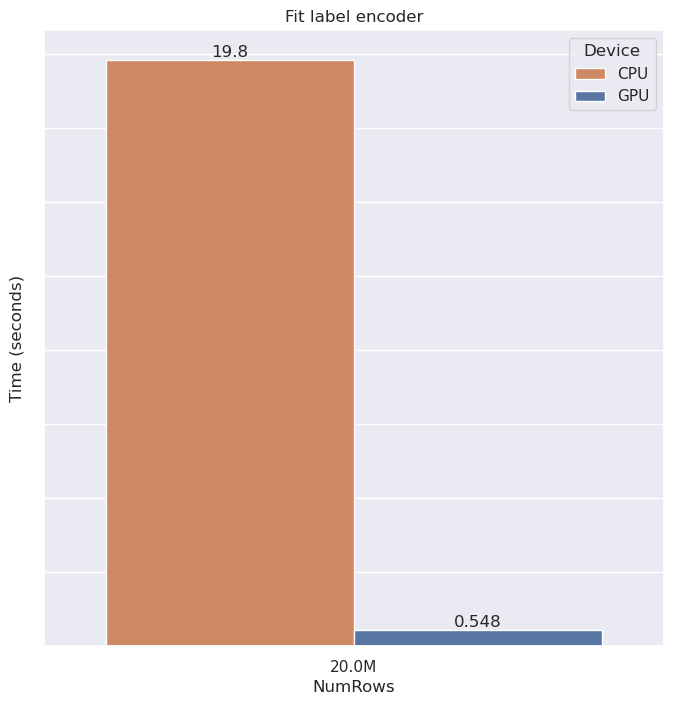

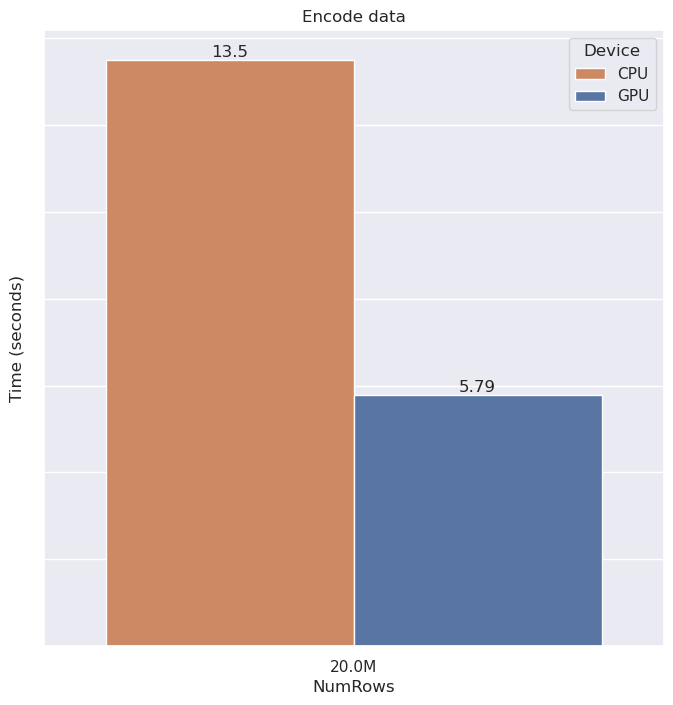

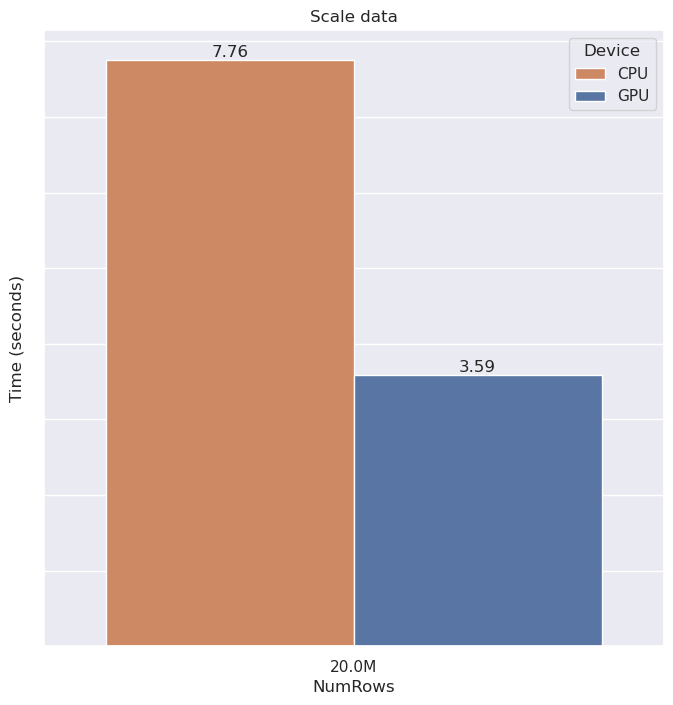

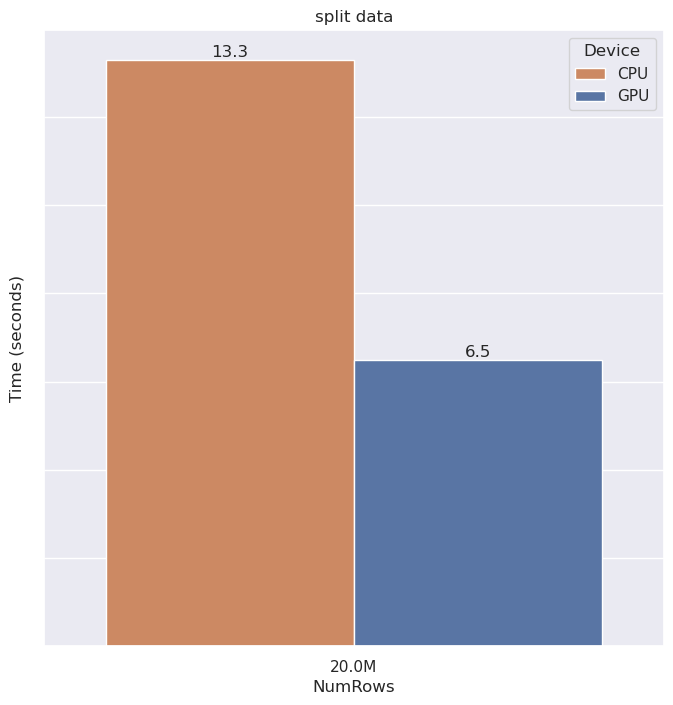

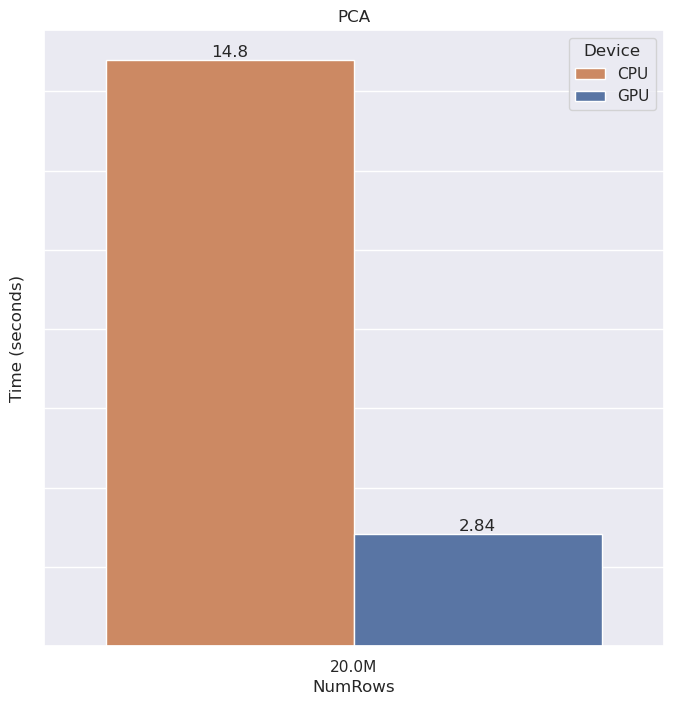

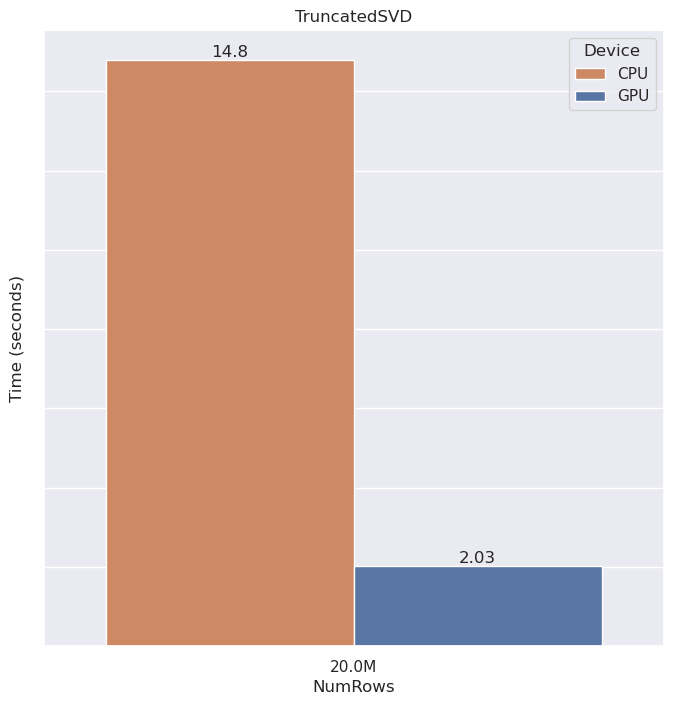

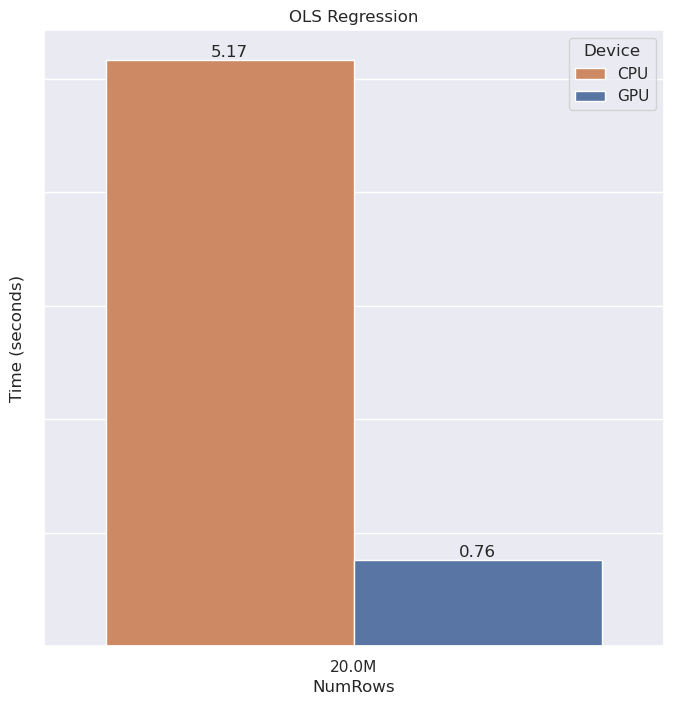

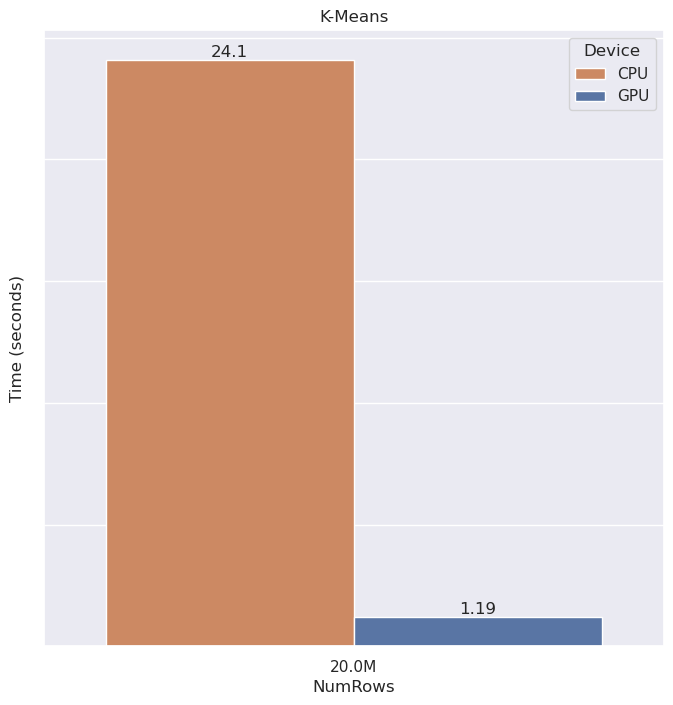

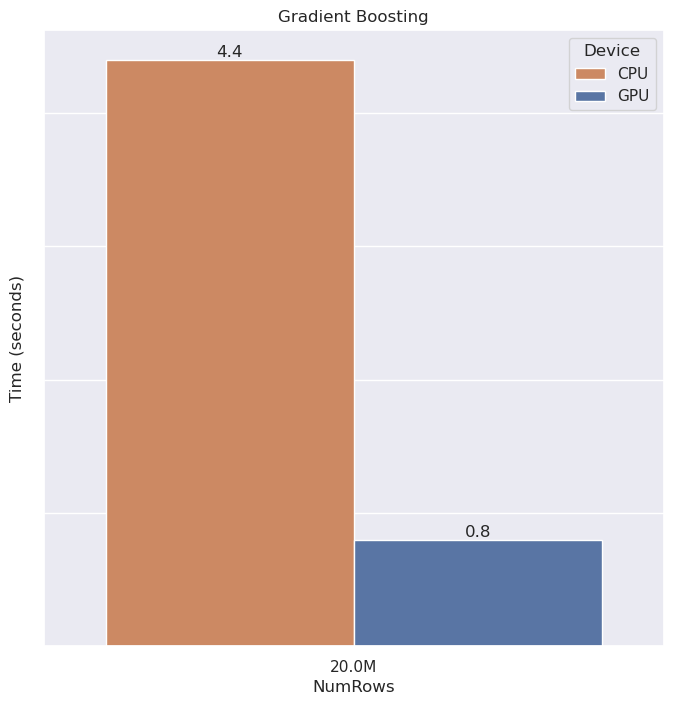

In [17]:
unq_tasks = df['Task'].unique()
for a_task in unq_tasks:
    cur_df = df[df['Task'] == a_task].copy()
    cur_df['Time (seconds)'] = cur_df['Time (seconds)'].round(3)
    fig = sns.barplot(data=cur_df, x='NumRows', y='Time (seconds)', hue='Device', palette=["C1", "C0"])
    fig.set_title(a_task)
    for container in fig.containers:
        fig.bar_label(container)
    fig.set(yticklabels=[])
    xlabels = [f'{x}M' for x in df['NumRows'].unique()/1000000]
    fig.set_xticklabels(xlabels)
    plt.savefig(f"./plots/{a_task.replace(' ', '_')}.png", bbox_inches='tight')
    plt.show()